In [1]:
# importing the necessary libraries to run the code
from env import get_db_url
from wrangle import wrangle_telco_data, split_telco_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
# imports for Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from modeling import decision_tree, difference_graph, analysis_tree, print_tree_reprt
from modeling import dictionary_values

# Acquire Data

In [2]:
# running the function from my wrangle.py file to prepare and split my data
df = wrangle_telco_data()
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,Yes,No,No,No phone service
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No,No internet service,Yes,No,No,Yes,Yes
online_backup,Yes,No,No,Yes,No,No,Yes,No,No,Yes,...,No internet service,Yes,Yes,No,No internet service,No,No,Yes,No,Yes


In [3]:
df.churn_Yes.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_Yes, dtype: float64

In [4]:
train, validate, test = split_telco_data(df)

In [5]:
train.churn_Yes.value_counts(normalize=True)

0    0.734675
1    0.265325
Name: churn_Yes, dtype: float64

 ### Data Types, Shape

In [6]:
df.shape

(7043, 50)

In [7]:
# seeing all my data types
df.dtypes


customer_id                               object
gender                                    object
senior_citizen                            object
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                            float64
churn                                     object
contract_type                             object
internet_service_type                     object
payment_type        

In [8]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,Yes,No,No,No phone service
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No,No internet service,Yes,No,No,Yes,Yes
online_backup,Yes,No,No,Yes,No,No,Yes,No,No,Yes,...,No internet service,Yes,Yes,No,No internet service,No,No,Yes,No,Yes


In [9]:
df.baseline_prediction.value_counts()

0    7043
Name: baseline_prediction, dtype: int64

In [10]:
# shows the categories for all the columns 
for col in df:
    print(df[col].value_counts())

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: senior_citizen, dtype: int64
No     3641
Yes    3402
Name: partner, dtype: int64
No     4933
Yes    2110
Name: dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: phone_service, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
No  

### Data Value Counts:

In [11]:
# looping through all columns to return a value count
for col in df:
    print(df[col].value_counts(dropna=False))
    print('-------')

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
-------
Male      3555
Female    3488
Name: gender, dtype: int64
-------
0    5901
1    1142
Name: senior_citizen, dtype: int64
-------
No     3641
Yes    3402
Name: partner, dtype: int64
-------
No     4933
Yes    2110
Name: dependents, dtype: int64
-------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------
Yes    6361
No      682
Name: phone_service, dtype: int64
-------
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
-------
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
-------
No                     3088
Yes                   

# Explore data in search of drivers for churn
## * Answer the following initial questions:

### DSL vs Churn
   * Are customers with DSL more or less likely to churn?
   

In [12]:
train.internet_service_type.value_counts()

Fiber optic    1855
DSL            1447
None            923
Name: internet_service_type, dtype: int64

In [13]:
none = train[train['internet_service_type']=='None'].churn.value_counts()
fiber = train[train['internet_service_type']=='Fiber optic'].churn.value_counts()
dsl = train[train['internet_service_type']=='DSL'].churn.value_counts()
total = train['internet_service_type'].value_counts().sum()
total

4225

In [14]:
fiber

No     1082
Yes     773
Name: churn, dtype: int64

In [15]:
train['internet_service_type'].value_counts()

Fiber optic    1855
DSL            1447
None            923
Name: internet_service_type, dtype: int64

In [16]:
total_yes = dsl+none+fiber
total_yes[1]

1121

In [17]:
mean = total_yes[1]/total

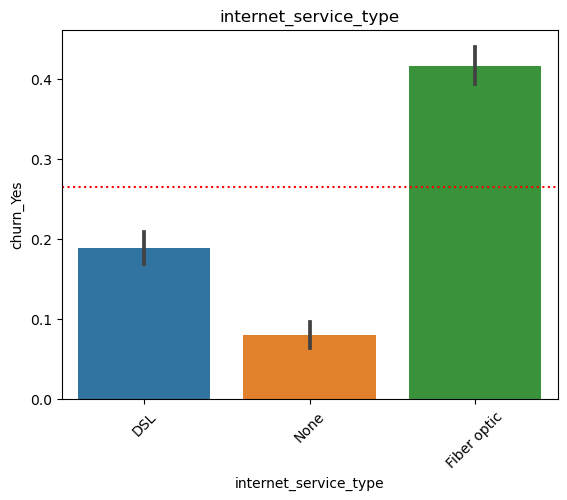

In [18]:
sns.barplot(x='internet_service_type', y='churn_Yes', data=train)
plt.title('internet_service_type')
mean = total_yes[1]/total
plt.axhline(mean, label="Churn Mean", color='red', linestyle='dotted')
plt.xticks(rotation=45)

plt.show()

### Takeaways:

* DSL is not a strong reason why customers leave
* Customers with Fiber Optics have more churn than DSL

### Contract vs Churn

* What month are customers most likely to churn and does that depend on their contract type?
   

In [19]:
train.groupby('tenure').churn_Yes.sum().sort_values(ascending=False)

tenure
1     228
2      80
3      51
4      46
7      35
     ... 
63      2
60      2
69      2
64      1
0       0
Name: churn_Yes, Length: 73, dtype: uint8

In [20]:
train.tenure.value_counts()

1     358
72    217
2     143
3     112
71    106
     ... 
43     32
44     31
45     31
36     30
0       9
Name: tenure, Length: 73, dtype: int64

In [21]:
len(train[train['contract_type']=='Month-to-month'].groupby('tenure'))

72

In [22]:
# looks for the rows where contract type is month to month and groups by their tenure
# and then pulls the column 'churn_Yes' to be abel to aggregate the sum of churn and
# then sorts by descending order
# then divides by the length of that list to get the percentage of 
month_to_month = (train[train['contract_type']=='Month-to-month'].groupby('tenure')\
.churn_Yes.sum().sort_values(ascending=False))/len(train[train['contract_type']=='Month-to-month'])
month_to_month

tenure
1     0.098403
2     0.034096
3     0.022011
4     0.019853
7     0.015106
        ...   
64    0.000000
67    0.000000
68    0.000000
56    0.000000
72    0.000000
Name: churn_Yes, Length: 72, dtype: float64

### Churn values per contract type

* Month to Month

In [23]:
sum_month_to_month = train[train['contract_type']=='Month-to-month'].groupby('tenure')\
.churn_Yes.sum().sort_values(ascending=False)
sum_month_to_month = pd.DataFrame(sum_month_to_month)
sum_month_to_month.head()

,churn_Yes
tenure,
1,228
2,79
3,51
4,46
7,35


In [24]:
sum_month_to_month[sum_month_to_month.index==1]

,churn_Yes
tenure,
1,228


In [25]:
# looks for the rows where contract type is month to month and groups by their tenure
# and then pulls the column 'churn_Yes' to be abel to aggregate the sum of churn and
# then sorts by descending order
# then divides by the length of that list to get the percentage of 
one_year = (train[train['contract_type']=='One year'].groupby('tenure')\
.churn_Yes.sum().sort_values(ascending=False))/len(train[train['contract_type']=='One year'])
one_year

tenure
54    0.006572
53    0.006572
58    0.005476
41    0.004381
56    0.004381
        ...   
29    0.000000
32    0.000000
34    0.000000
1     0.000000
72    0.000000
Name: churn_Yes, Length: 73, dtype: float64

In [26]:
sum_one_year = train[train['contract_type']=='One year'].groupby('tenure')\
.churn_Yes.sum().sort_values(ascending=False)
sum_one_year = pd.DataFrame(sum_one_year)
sum_one_year.head()

,churn_Yes
tenure,
54,6
53,6
58,5
41,4
56,4


In [27]:
sum_one_year[sum_one_year.index==1]

,churn_Yes
tenure,
1,0


In [28]:
# looks for the rows where contract type is month to month and groups by their tenure
# and then pulls the column 'churn_Yes' to be abel to aggregate the sum of churn and
# then sorts by descending order
# then divides by the length of that list to get the percentage of 
two_year = (train[train['contract_type']=='Two year'].groupby('tenure')\
.churn_Yes.sum().sort_values(ascending=False))/len(train[train['contract_type']=='Two year'])
two_year

tenure
71    0.004020
72    0.003015
67    0.003015
61    0.003015
70    0.002010
        ...   
24    0.000000
23    0.000000
22    0.000000
21    0.000000
37    0.000000
Name: churn_Yes, Length: 72, dtype: float64

In [29]:
sum_two_year = train[train['contract_type']=='Two year'].groupby('tenure')\
.churn_Yes.sum().sort_values(ascending=False)
sum_two_year = pd.DataFrame(sum_two_year)
sum_two_year.head()

,churn_Yes
tenure,
71,4
72,3
67,3
61,3
70,2


In [30]:
sum_two_year[sum_two_year.index==1]

,churn_Yes
tenure,
1,0


In [31]:
tw_yr = train[train['contract_type']=='Two year']
tw_yr = pd.DataFrame(tw_yr)
tw_yr.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,1,1,0,0,1,0,0,0,0,0
4694,6619-RPLQZ,Female,0,Yes,Yes,45,Yes,No,No internet service,No internet service,...,0,0,0,0,1,0,1,0,0,1
329,0487-CRLZF,Female,0,No,No,49,Yes,No,No,No,...,1,1,0,0,1,0,0,0,0,0
3715,5227-JSCFE,Male,1,Yes,No,71,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,0,1,0,0
5715,8050-DVOJX,Male,1,No,No,49,Yes,Yes,Yes,Yes,...,1,0,0,0,1,0,0,1,0,0


### Histogram of contract types

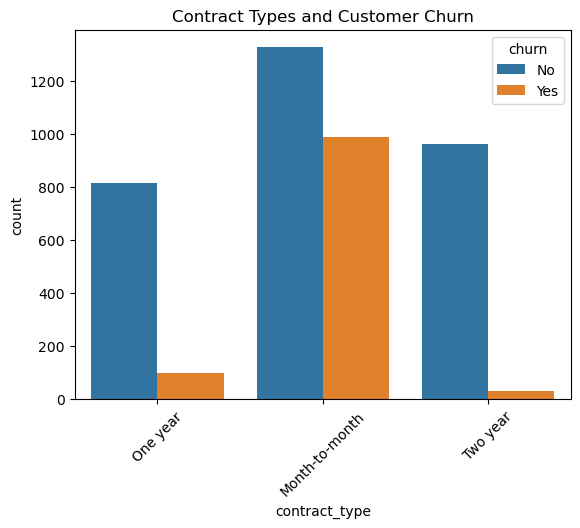

In [32]:
sns.countplot(x='contract_type', hue='churn', data=train)
plt.title('Contract Types and Customer Churn')

plt.xticks(rotation=45)

plt.show()

### Top Contract Type and Customer Churn

In [33]:
display(sum_month_to_month.head(1) )

,churn_Yes
tenure,
1,228


In [34]:
sum_one_year.head(1)


,churn_Yes
tenure,
54,6


In [35]:
sum_two_year.head(1)

,churn_Yes
tenure,
71,4


### Takeaways:

* Most churn happens with the month-to-month customer
* Customers with the most retention are on two year plans

### Any vs Churn

   * Is there a service that is associated with more churn than expected?  

In [36]:
train.payment_type.value_counts()

Electronic check             1423
Mailed check                  950
Bank transfer (automatic)     933
Credit card (automatic)       919
Name: payment_type, dtype: int64

In [37]:
e_check = pd.DataFrame(train[train['payment_type']=='Electronic check'].churn_Yes.value_counts())
e_check

,churn_Yes
0,780
1,643


In [38]:
e_mail = pd.DataFrame(train[train['payment_type']=='Mailed check'].churn_Yes.value_counts())
e_mail

,churn_Yes
0,761
1,189


In [39]:
b_transfer = pd.DataFrame(train[train['payment_type']=='Bank transfer (automatic)'].churn_Yes.value_counts())
b_transfer

,churn_Yes
0,789
1,144


In [40]:
c_card = pd.DataFrame(train[train['payment_type']=='Credit card (automatic)'].churn_Yes.value_counts())
c_card

,churn_Yes
0,774
1,145


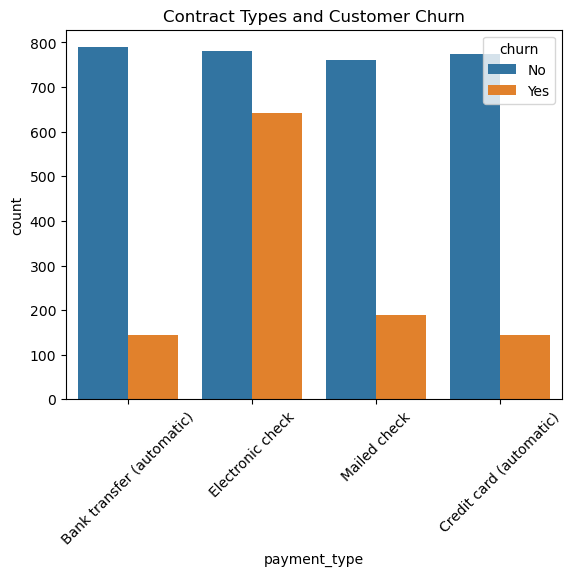

In [41]:
sns.countplot(x='payment_type', hue='churn', data=train)
plt.title('Contract Types and Customer Churn')

plt.xticks(rotation=45)

plt.show()

In [42]:
def payment_v_churn():
    
    sns.countplot(x='payment_type', hue='churn', data=train)
    plt.title('Contract Types and Customer Churn')
    
    plt.xticks(rotation=45)
    
    plt.show()

### Takeaways:

* There are a total of 1423 Electronic Check customers 
* 643 of those have churn thats 45% churn rate
* It is more that all the payment methods combined

   * Do customers who churn have a higher average monthly spend than those who don't?

### Monthly Charges vs Churn

In [43]:
train.T

,5911,2479,5889,6087,785,3057,5757,3465,1539,3175,...,4998,2899,6358,1795,5269,6102,356,1756,2127,3586
customer_id,8319-QBEHW,3547-LQRIK,8280-MQRQN,8626-PTQGE,1142-IHLOO,4374-YMUSQ,8098-LLAZX,4910-GMJOT,2250-IVBWA,4550-VBOFE,...,7025-IWFHT,4130-MZLCC,8999-EXMNO,2621-UDNLU,7426-WEIJX,8642-GVWRF,0523-VNGTF,2568-BRGYX,3057-VJJQE,5081-NWSUP
gender,Male,Female,Female,Male,Female,Male,Female,Female,Male,Male,...,Male,Female,Female,Female,Male,Female,Female,Male,Male,Female
senior_citizen,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
partner,No,Yes,No,No,No,No,No,No,Yes,Yes,...,No,No,Yes,Yes,Yes,Yes,No,No,No,No
dependents,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,Yes,No,Yes,No,No,No,No,No
tenure,26,47,1,69,51,34,4,1,64,70,...,41,5,19,3,60,2,52,4,35,10
phone_service,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
multiple_lines,No phone service,Yes,No,No phone service,No,Yes,Yes,Yes,No,Yes,...,No,No,No,No,Yes,No,No phone service,No,Yes,No
online_security,No,No internet service,No,Yes,No,Yes,No,No,Yes,No,...,No,No,No internet service,No internet service,Yes,No,No,No,Yes,No
online_backup,Yes,No internet service,No,Yes,No,Yes,No,No,Yes,Yes,...,Yes,Yes,No internet service,No internet service,No,Yes,Yes,No,No,Yes


In [44]:
# high_avg = pd.DataFrame(train[train['total_charges']/train['tenure']>train['monthly_charges']]\
# .churn_Yes.value_counts())

# high_avg

In [45]:
# low_avg = pd.DataFrame(train[train['total_charges']/train['tenure']<=train['monthly_charges']]\
# .churn_Yes.value_counts())

# low_avg

In [46]:
high_avg = pd.DataFrame(train[train['monthly_charges']>50].churn_Yes)

high_avg

,churn_Yes
5889,1
6087,0
785,0
3057,0
5757,1
...,...
6102,1
356,0
1756,1
2127,0


In [47]:
low_avg = pd.DataFrame(train[train['monthly_charges']<=50].churn_Yes)

low_avg

,churn_Yes
5911,0
2479,0
4694,0
3715,0
2572,1
...,...
4364,1
1298,0
582,0
6358,0


In [48]:
len(high_avg)

2858

In [49]:
len(low_avg)

1367

In [50]:
len(train)

4225

In [51]:
len(low_avg)+len(high_avg)

4225

In [52]:
train_no = train[train['churn_Yes']==0]
train_no.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,0,1,0,1,0,0,0,0,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,0,0,0,1,0,0,1,0,1,0
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,1,1,0,0,1,0,0,0,0,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,1,0,0,1,0,1,0,1,0,0
3057,4374-YMUSQ,Male,0,No,No,34,Yes,Yes,Yes,Yes,...,1,0,0,1,0,1,0,1,0,0


In [53]:
train_yes = train[train['churn_Yes']==1]
train_yes.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,0,1,1,0,0,0,0,0,0,1
5757,8098-LLAZX,Female,1,No,No,4,Yes,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
3465,4910-GMJOT,Female,0,No,No,1,Yes,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
3175,4550-VBOFE,Male,1,Yes,No,70,Yes,Yes,No,Yes,...,1,1,1,0,0,1,0,0,1,0
2572,3677-IYRBF,Female,1,No,No,2,No,No phone service,No,No,...,0,1,1,0,0,0,0,0,1,0


In [54]:
train_no.T

,5911,2479,6087,785,3057,1539,495,4694,329,3715,...,4308,582,4998,2899,6358,1795,5269,356,2127,3586
customer_id,8319-QBEHW,3547-LQRIK,8626-PTQGE,1142-IHLOO,4374-YMUSQ,2250-IVBWA,0725-CXOTM,6619-RPLQZ,0487-CRLZF,5227-JSCFE,...,6075-SLNIL,0854-UYHZD,7025-IWFHT,4130-MZLCC,8999-EXMNO,2621-UDNLU,7426-WEIJX,0523-VNGTF,3057-VJJQE,5081-NWSUP
gender,Male,Female,Male,Female,Male,Male,Female,Female,Female,Male,...,Male,Female,Male,Female,Female,Female,Male,Female,Male,Female
senior_citizen,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
partner,No,Yes,No,No,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,Yes,Yes,Yes,No,No,No
dependents,Yes,No,No,No,No,Yes,No,Yes,No,No,...,No,Yes,No,No,Yes,No,Yes,No,No,No
tenure,26,47,69,51,34,64,36,45,49,71,...,38,13,41,5,19,3,60,52,35,10
phone_service,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
multiple_lines,No phone service,Yes,No phone service,No,Yes,No,Yes,No,No,No phone service,...,Yes,No,No,No,No,No,Yes,No phone service,Yes,No
online_security,No,No internet service,Yes,No,Yes,Yes,Yes,No internet service,No,Yes,...,No,No internet service,No,No,No internet service,No internet service,Yes,No,Yes,No
online_backup,Yes,No internet service,Yes,No,Yes,Yes,No,No internet service,No,Yes,...,Yes,No internet service,Yes,Yes,No internet service,No internet service,No,Yes,No,Yes


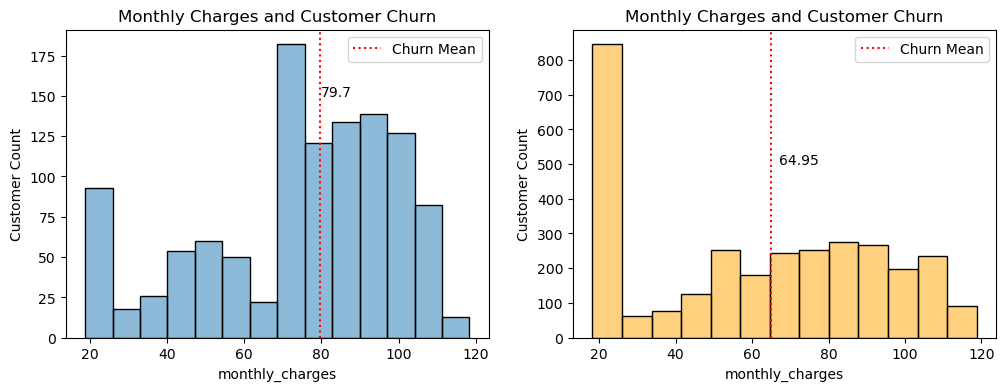

In [57]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(x='monthly_charges', hue='churn', data=train_yes, ax=ax1)
ax1.set_title('Monthly Charges and Customer Churn')
ax1.set_ylabel('Customer Count')
median1 = train_yes['monthly_charges'].median()
ax1.axvline(median1, label="Churn Mean", color='red', linestyle='dotted')
ax1.annotate(text=round(train_yes['monthly_charges'].median(),2), xy=(80,150)) 
ax1.legend()

sns.histplot(x='monthly_charges', hue='churn', data=train_no, ax=ax2, palette=['orange'])
#needs palettte=['orange'] to add orange color on No churn

ax2.set_title('Monthly Charges and Customer Churn') # neeed ax2.set_title to add title on weach block
ax2.set_ylabel('Customer Count')
median2 = train_no['monthly_charges'].median()
ax2.axvline(median2, label="Churn Mean", color='red', linestyle='dotted')
ax2.annotate(text=round(train_no['monthly_charges'].median(),2), xy=(67,500))
ax2.legend()


plt.show()


In [ ]:
# lookin g at this visual the average monthly charges are higher with the churning customers
# thechurn rate takes a significant spike when reaching ~$70

### Monthly Charges for more than $70

In [58]:
train_70 = train[train['monthly_charges']>=70]
train_70.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,1,0,0,1,0,1,0,1,0,0
3057,4374-YMUSQ,Male,0,No,No,34,Yes,Yes,Yes,Yes,...,1,0,0,1,0,1,0,1,0,0
5757,8098-LLAZX,Female,1,No,No,4,Yes,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
3465,4910-GMJOT,Female,0,No,No,1,Yes,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
1539,2250-IVBWA,Male,0,Yes,Yes,64,Yes,No,Yes,Yes,...,0,0,0,0,0,1,0,0,1,0


In [59]:
train_70_yes = train_70[train_70['churn_Yes']==1]
train_70_yes.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5757,8098-LLAZX,Female,1,No,No,4,Yes,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
3465,4910-GMJOT,Female,0,No,No,1,Yes,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
3175,4550-VBOFE,Male,1,Yes,No,70,Yes,Yes,No,Yes,...,1,1,1,0,0,1,0,0,1,0
6607,9391-EOYLI,Male,1,Yes,No,12,Yes,No,No,No,...,1,1,1,0,0,1,0,0,1,0
6319,8945-MUQUF,Male,0,No,No,51,Yes,Yes,Yes,Yes,...,0,1,1,1,0,1,0,0,1,0


In [60]:
train_70_no = train_70[train_70['churn_Yes']==0]
train_70_no.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,1,0,0,1,0,1,0,1,0,0
3057,4374-YMUSQ,Male,0,No,No,34,Yes,Yes,Yes,Yes,...,1,0,0,1,0,1,0,1,0,0
1539,2250-IVBWA,Male,0,Yes,Yes,64,Yes,No,Yes,Yes,...,0,0,0,0,0,1,0,0,1,0
495,0725-CXOTM,Female,0,No,No,36,Yes,Yes,Yes,No,...,1,1,0,1,0,0,0,1,0,0
329,0487-CRLZF,Female,0,No,No,49,Yes,No,No,No,...,1,1,0,0,1,0,0,0,0,0


/var/folders/qh/kjmdb2zx3n3b2ng_n4q3cyn00000gn/T/ipykernel_96962/367373479.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


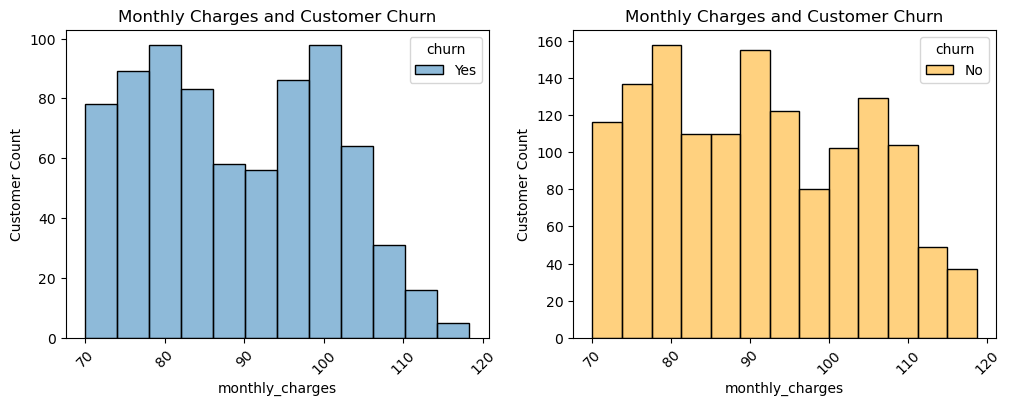

In [66]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(x='monthly_charges', hue='churn', data=train_70_yes, ax=ax1)
ax1.set_title('Monthly Charges and Customer Churn')
ax1.set_ylabel('Customer Count')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


sns.histplot(x='monthly_charges', hue='churn', data=train_70_no, ax=ax2, palette=['orange'])
#needs palettte=['orange'] to add orange color on No churn
ax2.set_title('Monthly Charges and Customer Churn') # neeed ax2.set_title to add title on weach block
ax2.set_ylabel('Customer Count')

plt.xticks(rotation=45)


plt.show()

### Customers who churn over with monthly payments of $70

In [62]:
train_70_yes.customer_id.count()

762

### Takeaways
* The customers who pay more than \$70 have the highest churn rate
* There are 762 customers who churn
* The median monthly payment for customers who churns is \$79.70
* The median monthly payment for customers who don't churn is \$64.95

In [ ]:
# alpha = 0.05
# vir_mean = train.groupby('species')['petal_width'].get_group('virginica')
# vers_mean = train.groupby('species')['petal_width'].get_group('versicolor')
# t, p = stats.mannwhitneyu(vers_mean, vir_mean)
# print(p)
# print(t)
# if p < alpha:
#     print("We reject the null hypothesis that")
# else:
#     print("We fail to reject the null hypothesis")

## Evaluation Question:
* Are charges of customers who churn significantly greater than who do not churn?

### Hypothesis:

* H-o = Charges of customers is equal or less than who don't churn?
* H-a = Charges of customers is greater than who don't churn?

In [ ]:
# when testing for T-test we need to have greater than or less than 

In [ ]:
# set the alpha
alpha = 0.05

In [ ]:
# 
trn_mon_churn_yes = train[train['churn_Yes']==1].monthly_charges
trn_mon_churn_no = train[train['churn_Yes']==0].monthly_charges

In [ ]:
# plotting to see the distribution
plt.figure(figsize=(9,6))
plt.hist([trn_mon_churn_yes , trn_mon_churn_no], label=["Churn", "No Churn"])
plt.legend(loc="upper right")

In [ ]:
# how many observations I have for each sample? (N>30,we we meet normality condition)

trn_mon_churn_yes.count(), trn_mon_churn_no.count()

In [ ]:
# is the variance same for both sample? Yes

trn_mon_churn_yes.var(), trn_mon_churn_no.var()

In [ ]:
# running the stats test
t, p = stats.ttest_ind(trn_mon_churn_yes, trn_mon_churn_no, equal_var=False)

t, p

In [ ]:
if p < alpha:

    print("Reject the Null Hypothesis ")
else:
    print("There is no evidence to reget the Null Hypothesis")


## Evaluation Question:
* Is there a service that is associated with more churn than expected?

    Customer with Manual Payments are more or less likely to churn?

### Hypothesis:

* H-o = There is no relation in churn between customers with auto and manual payments.
* H-a = There is a relation in churn between customers with auto and manual payments.

In [ ]:
train.columns

In [ ]:
observed = pd.crosstab(train['payment_type'], train['churn_Yes'])
observed


In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

In [ ]:
if p < alpha:
    print('We reject the Null hypothesis')
else:
    print('There is no evidence to reget the Null Hypothesis')

### Plot the findings

In [ ]:


sns.barplot(x='internet_service_type', y='churn_Yes', data=train)
plt.title('internet_service_type')
mean = total_yes[1]/total
plt.axhline(mean, label="Churn Mean", color='red', linestyle='dotted')
plt.xticks(rotation=45)

plt.show()
    

### Data Category Counts:

In [ ]:
# looping through all columns to return a the number of categories in all each column this 
# info will be used to determine categorical or continuous columns
for col in df:
    print(col)
    print(df[col].nunique())
    print('-------')

# Univariate Data

In [ ]:
# create the list to store returned values
categorical_col = []
continuous_col = []

# create a for loop that iterates through each value in train dataframe
for col in train:
    # appends the column name to categoriacl_col if there are less than 10 categories in column
    if train[col].nunique() < 10:
        categorical_col.append(col)
    else: 
    # appends the column name to continuous_list if there are less than 10 categories in column
        continuous_col.append(col)

# create a for loop that iterates through each value in categorical_col
for feature in categorical_col:
    
    # plots the points using the items(features) in the cat_list
    sns.countplot(x=feature, data=train)
    plt.title(feature)
    plt.xticks(rotation=45)

    plt.show()
    
    
for feature in continuous_col:
    
    sns.histplot(x=feature, data=train)
    plt.title(feature)
    plt.show()

### Churn Value Count:

In [ ]:
train.churn.value_counts()



In [ ]:
train.columns

# Bivariate Data

In [ ]:
# create the list to store returned values
categorical_col = []
continuous_col = []

# create a for loop that iterates through each value in train dataframe
for col in train:
    if col != 'churn_Yes' and train[col].nunique() < 10 and (train[col].dtype == 'int64' or train[col].dtype == 'float64' or train[col].dtype == 'uint8'):
        categorical_col.append(col)
    elif train[col].nunique() > 10:
        continuous_col.append(col)
        
# create a for loop that iterates through each value in categorical_col        
for feature in categorical_col:
    
    sns.barplot(x='churn', y=feature, data=train)
    mean = train[feature].mean()
    plt.axhline(mean, label="Churn Mean", color='red', linestyle='dotted')
    plt.title(feature)
    plt.xticks(rotation=45)

    plt.show()
    
    
for feature in continuous_col:
    if feature != 'customer_id':
        sns.barplot(x='churn', y=feature, data=train)
        mean = train[feature].mean()
        plt.axhline(mean, label="Churn Mean", color='red', linestyle='dotted')
        plt.title(feature)
        plt.show()

### Takeaways:

* Customers on ocntracts have a low churn rate
* Customers with these services: Streaming TV, Streaming Moviews, and Fiber Optic internet have a high churn rate
* Customers with non automatic payment types have a higher churn rate
* Monthly charges seems to have a notable effect on churn rate

# Multivariate Stats:

In [ ]:
train.columns

### Selecting only the continutous features to pair plot

In [ ]:
# showing the features for the pair plot
continuous_col

In [ ]:
# pair plot
# adding 'churn' to be able to hue on churn data

sns.pairplot(data=train[['tenure', 'monthly_charges', 'total_charges', 'churn']], hue='churn' , corner=True)
plt.show()

# Models

In [ ]:
train.churn_Yes.value_counts(normalize=True)

## Decision Tree Model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
decision_tree()

In [ ]:
train_depth, train_score_list, val_score_list, diff_list = dictionary_values()

In [ ]:
print_tree_reprt()

In [ ]:
difference_graph()

## KNN Model

In [ ]:
from modeling import knn_model, knn_analysis, knn_dictionary_values, knn_difference_graph, print_knn_reprt

In [ ]:
knn_model()

In [ ]:
train_dict, val_dict, diff_dict = knn_analysis()
val_dict

In [ ]:
print_knn_reprt()

In [ ]:
knn_difference_graph()

## Log Model

In [ ]:
from modeling import log_model, log_analysis, log_dictionary_values, log_difference_graph, print_log_reprt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
log_model()

In [ ]:
log_difference_graph()

In [ ]:
print_log_reprt()

# Random Forest Model

In [ ]:
from modeling import print_forest_report

In [ ]:
from modeling import forest_model, print_forest_report, forest_difference_graph, forest_analysis, forest_dictionary_values

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
forest_model()

In [ ]:
train_dict, val_dict, diff_dict = forest_analysis()

In [ ]:
train_dict[(3,8)]

In [ ]:
diff_dict

In [ ]:
forest_dictionary_values()

In [ ]:
print_forest_report()

In [ ]:
forest_difference_graph()